# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, units_num=[1024,512,256,128,256,128,64]):
    """
    Build your own model
    """
    layer_input = keras.layers.Input(input_shape)
    for i, unit in enumerate(units_num):
        if (i==0):
            x = keras.layers.Dense(units=unit, activation='relu')(layer_input)
        else:
            x = keras.layers.Dense(units=unit, activation='relu')(x)
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[layer_input], outputs=[out])
    return model

In [31]:
## 超參數設定
"""
Set your required experiment parameters
"""
epochs = 50
learning_rate=[1e-5,1e-3]
batchs = 256

In [32]:
results = {}

"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train,y_train,
              epochs=epochs,
              batch_size=batchs,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    train_acc = model.history.history["accuracy"]
    valid_loss = model.history.history["val_loss"]
    valid_acc = model.history.history["val_accuracy"]
    
    model_name_tag = "SGD with learning_rate= %f" %(lr)
    results[model_name_tag] = {'train_loss' : train_loss,
                               'train_acc' : train_acc,
                               'valid_loss' :valid_loss,
                               'valid_acc' : valid_acc,
                               }
    #RMSprop
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    opt = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train,y_train,
              epochs=epochs,
              batch_size=batchs,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    train_acc = model.history.history["accuracy"]
    valid_loss = model.history.history["val_loss"]
    valid_acc = model.history.history["val_accuracy"]
    
    model_name_tag = "RMSprop with learning_rate= %f" %(lr)
    results[model_name_tag] = {'train_loss' : train_loss,
                               'train_acc' : train_acc,
                               'valid_loss' :valid_loss,
                               'valid_acc' : valid_acc,
                               }
    #AdaGrad
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    opt = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train,y_train,
              epochs=epochs,
              batch_size=batchs,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    train_acc = model.history.history["accuracy"]
    valid_loss = model.history.history["val_loss"]
    valid_acc = model.history.history["val_accuracy"]
    
    model_name_tag = "Adagrad with learning_rate= %f" %(lr)
    results[model_name_tag] = {'train_loss' : train_loss,
                               'train_acc' : train_acc,
                               'valid_loss' :valid_loss,
                               'valid_acc' : valid_acc,
                               }
    #Adam
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    opt = keras.optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.fit(x_train,y_train,
              epochs=epochs,
              batch_size=batchs,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    train_acc = model.history.history["accuracy"]
    valid_loss = model.history.history["val_loss"]
    valid_acc = model.history.history["val_accuracy"]
    
    model_name_tag = "Adam with learning_rate= %f" %(lr)
    results[model_name_tag] = {'train_loss' : train_loss,
                               'train_acc' : train_acc,
                               'valid_loss' :valid_loss,
                               'valid_acc' : valid_acc,
                               }

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.3133 - accuracy: 0.0997 - val_loss: 2.3130 - val_accuracy: 0.0989
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3128 - accuracy: 0.0998 - val_loss: 2.3125 - val_accuracy: 0.0999
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3124 - accuracy: 0.0998 - val_loss: 2.3121 - val_accuracy: 0.1006
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 2.3120 - accuracy: 0.0995 - val_loss: 2.3116 - val_accuracy: 0.1003
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 2.3115 - accuracy: 0.0999 - val_loss: 2.3112 - val_accuracy: 0.1006
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 2.3111 - accuracy: 0.1005 - val_loss: 2.3108 - val_accuracy: 0.1007
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 2.3107 - accuracy: 0.1006 - val_loss: 2.3104 - val_accuracy: 0.1016
Epoch 

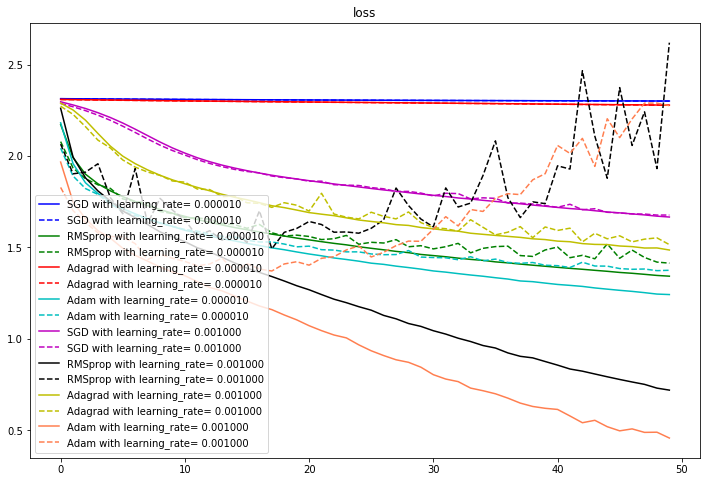

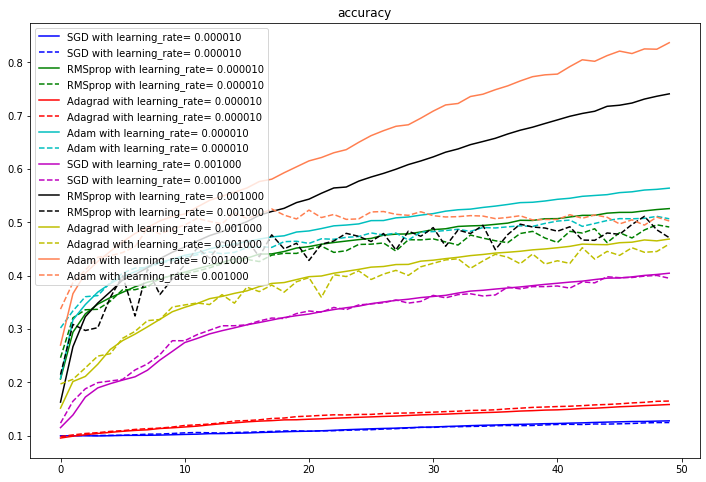

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['b','g','r','c','m','k','y','coral','lightpink','orchid','slategray','teal']

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()
